In [7]:
import cv2
import matplotlib.pyplot as plt

In [94]:
img = cv2.imread("pingouin.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

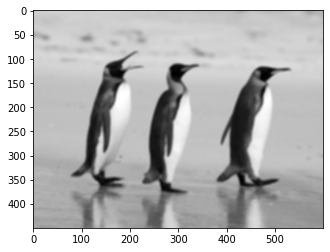

In [95]:
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 3)
plt.imshow(img_blurred, cmap="gray")

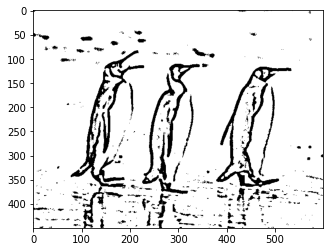

In [96]:
thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(thresh, cmap="gray")

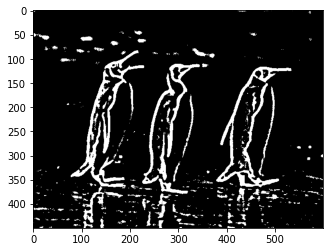

In [97]:
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap="gray")

In [98]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [99]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [100]:
sudoku_contour = None

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 4:
        sudoku_contour = approx
        break

if sudoku_contour is None:
    print("شرمنده داداش. جدول سودوکو رو نتونستم واست پیدا کنم")

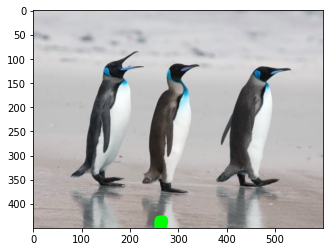

In [101]:
result = cv2.drawContours(img, [sudoku_contour], -1, (0, 255, 0), 20)
plt.imshow(result)